In [1]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import image as mpimg

In [2]:
mydataset = dataiku.Dataset("new_train")
total=mydataset.get_dataframe()
infodata = dataiku.Dataset("info")
info=infodata.get_dataframe()
total=total.to_numpy()

In [3]:
total

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
totaln=[]

In [5]:
for i,r in enumerate(total):
    print(np.pad(r, (8, 8), 'constant',  
                 constant_values=(0, 0)))
    totaln.append(np.pad(r, (8, 8), 'constant',  
                 constant_values=(0, 0)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0

In [6]:
totaln=np.array(totaln)

In [7]:
train, test=train_test_split(totaln,test_size=0.20,random_state=256)
train, val=train_test_split(train,test_size=0.10,random_state=256)

In [8]:
#total=pd.DataFrame(total)

In [9]:
info=info.sort_values('strip_id')

In [10]:
info=info.set_index('strip_id')

In [11]:
info

,device_bin_code,equipment_name,time
strip_id,,,
0.0,"521,",INSP-ACA-AWB2D2-002,2023-09-01 23:41:18
1.0,"521,517,",INSP-ACA-AWB2D2-002,2023-09-01 23:41:18
2.0,"516,",INSP-ACA-AWB2D2-002,2023-09-01 23:41:18
3.0,"530,530,530,",INSP-ACA-AWB2D2-002,2023-08-30 23:42:38
4.0,"530,530,530,530,530,530,530,530,530,",INSP-ACA-AWB2D2-002,2023-08-30 23:42:38
...,...,...,...
876.0,"518,",INSP-ACA-AWB2D2-018,2023-08-29 23:59:55
877.0,"516,",INSP-ACA-AWB2D2-018,2023-08-29 23:59:55
878.0,"516,",INSP-ACA-AWB2D2-009,2023-08-30 23:45:17


In [12]:
itrain,itest=train_test_split(info,test_size=0.20,random_state=256)

In [13]:
totaln=np.reshape(totaln,(-1,8,8))

In [14]:
totaln.shape

(881, 8, 8)

In [15]:
train.shape

(633, 64)

In [16]:
train=np.reshape(train,(-1,8,8))

In [17]:
test=np.reshape(test,(-1,8,8))

In [18]:
test.shape

(177, 8, 8)

In [19]:
val=np.reshape(val,(-1,8,8))

In [20]:
val.shape

(71, 8, 8)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,Reshape,Lambda,LeakyReLU,Dropout,BatchNormalization,Conv1D,Conv2D,Reshape
from tensorflow.keras import regularizers
from tensorflow.keras.losses import MeanSquaredError,BinaryCrossentropy
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
#from keras.utils.visualize_util import plot

In [22]:
trainf=tf.expand_dims(train, axis=-1)
valf=tf.expand_dims(val, axis=-1)
testf=tf.expand_dims(test, axis=-1)
totalf=tf.expand_dims(totaln, axis=-1)

In [23]:
trainf.shape

TensorShape([633, 8, 8, 1])

In [24]:
trainf

<tf.Tensor: shape=(633, 8, 8, 1), dtype=float64, numpy=
array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [1.],
         [0.],
         ...,
         [0.],
         [0.],
         [1.]],

        [[0.],
         [0.],
         [1.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[1.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
      

In [25]:
def _parse_function(filename, channels):
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=channels)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image 

In [26]:
trainf[632]

<tf.Tensor: shape=(8, 8, 1), dtype=float64, numpy=
array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]])>

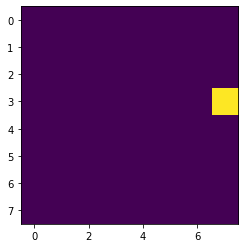

In [27]:
plt.imshow(trainf[632])

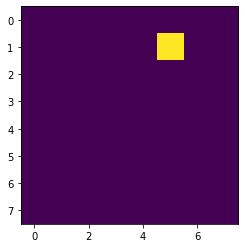

In [28]:
plt.imshow(totalf[632])

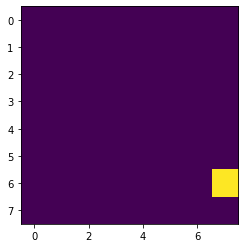

In [29]:
plt.imshow(valf[0])

In [30]:
tf.keras.backend.clear_session()

In [31]:
#train = tf.cast(arr_train, tf.float32)
#test = tf.cast(arr_test, tf.float32)

In [32]:
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder,self).__init__()
        #input_shape = (12, 12, 4, 1)
        self.encoder = tf.keras.Sequential([
            #tf.keras.Input(shape=(None,64)),
            tf.keras.layers.InputLayer(input_shape=(8,8,1)),
            #Reshape((12,4,1)),
            #Conv2D(8, 3, activation='relu',input_shape=(12,4,1)),
            #Conv2D(16, 3, activation='relu',input_shape=(12,4,1)),
            #Conv2D(24, 3, activation='relu',input_shape=(12,4,1)),
            Conv2D(32, 3, activation='relu',input_shape=(8,8,1)),
            #BatchNormalization(),
            Conv2D(16, 3, activation='relu'),
            #BatchNormalization(),
            #Conv1D(8, 5, activation='relu'),
            #Conv2D(4, 2, activation='relu'),
            #Conv2D(1, 2, activation=LeakyReLU(alpha=0.01),input_shape=(10,2,1)),
            #Conv2D(2, 3, activation=LeakyReLU(alpha=0.01),input_shape=(8,4,1)),
            Flatten(),
            #Dense(750,activation=LeakyReLU(alpha=0.01)),
            #BatchNormalization(),
            #Dense(500,activation=LeakyReLU(alpha=0.01)),
            #BatchNormalization(),
            #Dense(250,activation=LeakyReLU(alpha=0.01)),
            #BatchNormalization(),
            #Dropout(0.1),
            Dense(2),
            BatchNormalization(),
        ]
        )

        self.decoder = tf.keras.Sequential([
            Dense(2,activation=LeakyReLU(alpha=0.01)),
            #Dropout(0.2),
            BatchNormalization(),
            Dense(4,activation=LeakyReLU(alpha=0.01)),
            BatchNormalization(),
            Dense(8,activation=LeakyReLU(alpha=0.01)),
            #Dropout(0.2),
            BatchNormalization(),
            Dense(16,activation=LeakyReLU(alpha=0.01)),
            BatchNormalization(),
            Dense(32,activation=LeakyReLU(alpha=0.01)),
            #Dropout(0.2),
            BatchNormalization(),
            Dense(64,activation='sigmoid'),
            Reshape((8,8,1))
        ]
        )
    def encode(self,x):
        encoded = self.encoder(x)
        return encoded

    def decode(self, x):
        decoded = self.decoder(x)
        return decoded
 
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [33]:
class MyCallback(tf.keras.callbacks.Callback):

    def __init__(self, patience=0):
        super(MyCallback, self).__init__()

    def on_epoch_begin(self, epoch, logs=None):
        tf.print(self.model.get_weights())

In [34]:
epochs=20
lr=0.001
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,cooldown=1,
                              patience=3, min_lr=0.000001, verbose=1)
#def scheduler(epochs,lr):
#    if epoch<=5 :
#        return lr
#    else:
#        return lr*tf.math.exp(-0.1)
callbacks = [reduce_lr
            ]

In [35]:
#lr_scheduler=PolynomialDecay()

In [36]:
autoencoder= AutoEncoder()

In [37]:
#autoencoder.build()

In [38]:
autoencoder.compile(optimizer='adam',loss=BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [39]:
history=autoencoder.fit(totalf,totalf,epochs=epochs,validation_data=(valf,valf),callbacks=callbacks)

Epoch 1/20
28/28 [==============================] - 3s 12ms/step - loss: 0.9587 - accuracy: 0.5635 - val_loss: 0.9517 - val_accuracy: 0.8103
Epoch 2/20
28/28 [==============================] - 0s 4ms/step - loss: 0.9441 - accuracy: 0.6763 - val_loss: 0.9329 - val_accuracy: 0.9025
Epoch 3/20
28/28 [==============================] - 0s 4ms/step - loss: 0.9201 - accuracy: 0.7628 - val_loss: 0.8959 - val_accuracy: 0.9606
Epoch 4/20
28/28 [==============================] - 0s 4ms/step - loss: 0.8875 - accuracy: 0.8220 - val_loss: 0.8414 - val_accuracy: 0.9714
Epoch 5/20
28/28 [==============================] - 0s 4ms/step - loss: 0.8501 - accuracy: 0.8535 - val_loss: 0.7816 - val_accuracy: 0.9727
Epoch 6/20
28/28 [==============================] - 0s 4ms/step - loss: 0.8136 - accuracy: 0.8818 - val_loss: 0.7412 - val_accuracy: 0.9727
Epoch 7/20
28/28 [==============================] - 0s 4ms/step - loss: 0.7896 - accuracy: 0.8910 - val_loss: 0.7199 - val_accuracy: 0.9727
Epoch 8/20
28/28 [=

In [40]:
autoencoder.summary()

Model: "auto_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 2)                 5466      
_________________________________________________________________
sequential_1 (Sequential)    (None, 8, 8, 1)           3106      
Total params: 8,572
Trainable params: 8,444
Non-trainable params: 128
_________________________________________________________________


In [41]:
#get layer shape 
layers = autoencoder.layers
#first_layer = layers[0] # usually the first layer is the input layer
#print(first_layer.input_shape)  
#print(autoencoder.layers[1].input_shape[0])
for i, layer in enumerate(autoencoder.encoder.layers):
    print(f"Layer {i}:")
    #input_tensor = layer.input
    #output_tensor = layer.output
    try:
        weights=layer.get_weights()[0].shape
    except:
        #print(exception)
        pass
    print(f"weights: {weights}")
    print(f"Input shape: {layer.input_shape}")
    print(f"Output shape: {layer.output_shape}")

Layer 0:
weights: (3, 3, 1, 32)
Input shape: (None, 8, 8, 1)
Output shape: (None, 6, 6, 32)
Layer 1:
weights: (3, 3, 32, 16)
Input shape: (None, 6, 6, 32)
Output shape: (None, 4, 4, 16)
Layer 2:
weights: (3, 3, 32, 16)
Input shape: (None, 4, 4, 16)
Output shape: (None, 256)
Layer 3:
weights: (256, 2)
Input shape: (None, 256)
Output shape: (None, 2)
Layer 4:
weights: (2,)
Input shape: (None, 2)
Output shape: (None, 2)


In [42]:
loss_values = history.history['loss']
val_loss=history.history['val_loss']

In [43]:
accuracy=history.history['accuracy']
val_acc=history.history['val_accuracy']

In [44]:
#loss_values

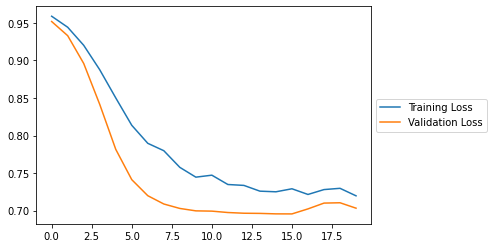

In [45]:
plt.plot(loss_values, label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

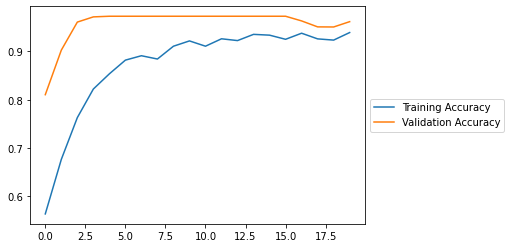

In [46]:
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [47]:
encode_train=autoencoder.encode(trainf)

In [48]:
decode_train=autoencoder.decode(encode_train)

In [49]:
encode_train

<tf.Tensor: shape=(633, 2), dtype=float32, numpy=
array([[-1.7367194 , -0.168289  ],
       [-0.42174393, -0.07484418],
       [-0.26498792, -0.22834724],
       ...,
       [-0.5787585 , -2.443868  ],
       [-0.6935113 , -0.20483571],
       [-0.75262475, -0.10858124]], dtype=float32)>

In [50]:
decode_train

<tf.Tensor: shape=(633, 8, 8, 1), dtype=float32, numpy=
array([[[[0.00222376],
         [0.00173566],
         [0.00141602],
         ...,
         [0.00167233],
         [0.00218731],
         [0.00305528]],

        [[0.00372274],
         [0.0029942 ],
         [0.00225496],
         ...,
         [0.00312671],
         [0.00175544],
         [0.00220991]],

        [[0.00238162],
         [0.00180945],
         [0.00274929],
         ...,
         [0.0029182 ],
         [0.00233036],
         [0.00558171]],

        ...,

        [[0.00204973],
         [0.00236701],
         [0.001607  ],
         ...,
         [0.00293152],
         [0.00408191],
         [0.00182067]],

        [[0.00341592],
         [0.0018652 ],
         [0.00180064],
         ...,
         [0.00282055],
         [0.00321512],
         [0.00379985]],

        [[0.00086502],
         [0.0022636 ],
         [0.00224073],
         ...,
         [0.00186668],
         [0.00298054],
         [0.00170942]]],


    

In [51]:
encode_train_df=pd.DataFrame(encode_train.numpy(),columns = ['x','y'])

In [52]:
#decode_train_df=pd.DataFrame(decode_train.numpy())

In [53]:
encode_train_df

,x,y
0,-1.736719,-0.168289
1,-0.421744,-0.074844
2,-0.264988,-0.228347
3,-1.220030,-1.721135
4,-1.812050,-1.025179
...,...,...
628,0.038503,0.309118
629,0.193291,-0.305195
630,-0.578758,-2.443868
631,-0.693511,-0.204836


In [54]:
#decode_train_df

#not used currently
import math
def sigmoid(x): 
    return np.clip(1 / (1 + np.exp(-x)), 0.000001, 0.999999)
decode_test_df = decode_train_df.applymap(sigmoid)

In [55]:
#decode_train_df

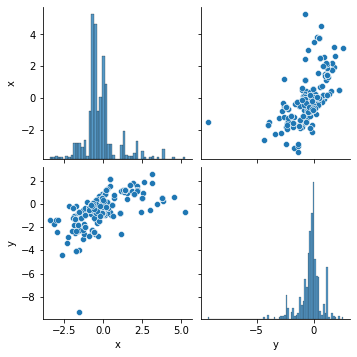

In [56]:
sns.pairplot(encode_train_df)

In [57]:
encode_test=autoencoder.encode(testf)
encode_test_df=pd.DataFrame(encode_test.numpy(),columns = ['x','y'])

In [58]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [59]:
dbscan=DBSCAN(eps = 0.0001, min_samples =2)
dbscan.fit(encode_train_df[['x']],encode_train_df[['y']])
encode_train_df['dbs']=dbscan.labels_

In [60]:
dbscan.fit_predict(encode_test_df[['x']],encode_test_df[['y']])
encode_test_df['dbs']=dbscan.labels_

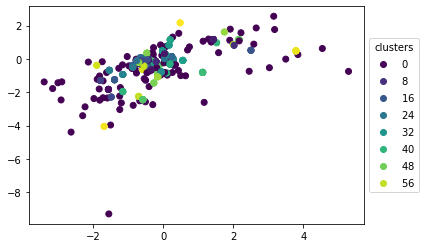

In [61]:
sc=plt.scatter(x=encode_train_df[['x']],y=encode_train_df['y'],c=encode_train_df['dbs'])
plt.legend(*sc.legend_elements(), title='clusters',loc='center left', bbox_to_anchor=(1, 0.5))

In [62]:
encode_train_df['dbs'].value_counts()

-1     98
 16    29
 6     24
 3     21
 4     19
 0     18
 21    18
 18    17
 20    17
 9     14
 45    14
 38    14
 29    14
 23    14
 12    13
 32    13
 19    13
 47    11
 51    10
 46    10
 50    10
 14    10
 35    10
 22     9
 43     9
 31     8
 55     8
 42     8
 53     7
 34     7
 5      7
 8      7
 30     7
 57     7
 11     7
 26     7
 25     7
 36     6
 2      6
 60     6
 10     6
 17     6
 1      6
 27     6
 33     5
 59     5
 40     5
 15     4
 49     3
 56     3
 37     3
 13     3
 24     2
 52     2
 41     2
 62     2
 7      2
 58     2
 54     2
 44     2
 48     2
 39     2
 61     2
 28     2
Name: dbs, dtype: int64

In [63]:
encode_train_df[encode_train_df['dbs']==22]

,x,y,dbs
37,-0.752625,-0.108581,22
189,-0.752625,-0.108581,22
234,-0.752625,-0.108581,22
290,-0.752625,-0.108581,22
332,-0.752625,-0.108581,22
339,-0.752625,-0.108581,22
500,-0.752625,-0.108581,22
534,-0.752625,-0.108581,22
632,-0.752625,-0.108581,22


In [64]:
encode_train_df.iloc[150]

x     -0.624667
y     -0.281028
dbs   -1.000000
Name: 150, dtype: float64

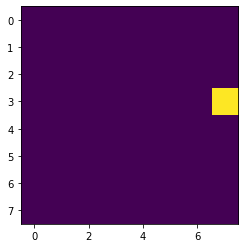

In [65]:
plt.imshow(trainf[37])

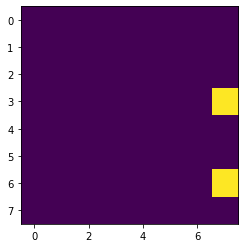

In [66]:
plt.imshow(trainf[150])

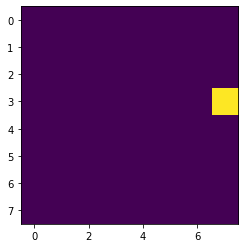

In [67]:
plt.imshow(trainf[189])

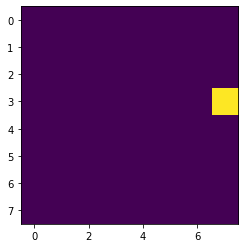

In [68]:
plt.imshow(trainf[234])

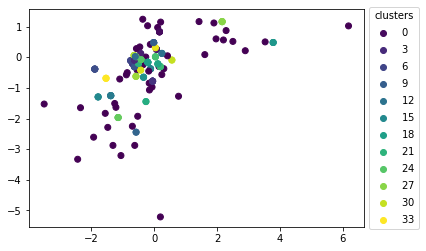

In [69]:
sc=plt.scatter(x=encode_test_df[['x']],y=encode_test_df['y'],c=encode_test_df['dbs'])
plt.legend(*sc.legend_elements(), title='clusters',loc='center left', bbox_to_anchor=(1, 0.5))

In [70]:
c=encode_test_df.dbs.value_counts()
clusters=pd.DataFrame(c)

In [71]:
clusters.drop(index=-1,inplace=True)

In [72]:
clusters=clusters.reset_index()
clusters=clusters.rename(columns={'dbs':'size','index':'cluster_index'})

In [73]:
clusters

,cluster_index,size
0,3,9
1,18,7
2,4,7
3,9,7
4,7,5
5,14,5
6,13,5
7,0,5
8,27,4
9,25,4


In [74]:
encode_test_df[encode_test_df['dbs']==19]

,x,y,dbs
41,0.114866,-0.215958,19
119,0.114866,-0.215958,19
143,0.114866,-0.215958,19


In [75]:
encode_test_df[encode_test_df['dbs']==13]

,x,y,dbs
28,-1.385547,-1.252323,13
58,-1.385547,-1.252323,13
101,-1.385547,-1.252323,13
139,-1.385547,-1.252323,13
171,-1.385547,-1.252323,13


In [76]:
strip_list=[]
clusters['no_of_defect']=0
for index,row in clusters.iterrows():
    string=""
    bincode=""
    equip=""
    time=""
    sin_cluster=encode_test_df[encode_test_df['dbs']==row['cluster_index']]
    sin_cluster=sin_cluster.reset_index()
    strip_list=strip_list=sin_cluster['index'].tolist()
    clusters.loc[index,'no_of_defect']=np.count_nonzero(test[strip_list[0]]==1)*clusters.loc[index,'size']
    for strip in strip_list:
        print(strip)
        string=str(strip)+","+string
        print(itest.iloc[strip,0])
        bincode=str(itest.iloc[strip,0])+bincode
        print(itest.iloc[strip,1])
        equip=str(itest.iloc[strip,1])+equip
        print(itest.iloc[strip,2])
        time=str(itest.iloc[strip,2])+time
        clusters.loc[index,'strip_id']=string
        clusters.loc[index,'bincode']=bincode
        clusters.loc[index,'equipment']=equip
        clusters.loc[index,'time']=time


8
517,
INSP-ACA-AWB2D2-009
2023-09-04 00:06:25
10
518,
INSP-ACA-AWB2D2-007
2023-09-04 00:05:36
34
516,
INSP-ACA-AWB2D2-009
2023-09-04 23:52:52
46
2,
INSP-ACA-AWB2D2-013
2023-08-31 23:56:13
102
517,
INSP-ACA-AWB2D2-018
2023-08-27 23:43:27
128
261,
INSP-ACA-AWB2D2-006
2023-09-04 00:07:17
136
517,
INSP-ACA-AWB2D2-009
2023-09-03 00:15:34
145
261,
INSP-ACA-AWB2D2-006
2023-08-25 23:45:37
150
644,
INSP-ACA-AWB2D2-010
2023-09-03 00:12:50
37
516,
INSP-ACA-AWB2D2-018
2023-08-28 23:53:00
43
261,
INSP-ACA-AWB2D2-010
2023-09-04 00:04:47
56
518,
INSP-ACA-AWB2D2-005
2023-09-03 00:11:35
65
644,
INSP-ACA-AWB2D2-007
2023-08-28 23:52:14
68
530,
INSP-ACA-AWB2D2-002
2023-09-04 23:50:42
106
272,
INSP-ACA-AWB2D2-006
2023-09-04 23:50:28
175
518,
INSP-ACA-AWB2D2-006
2023-08-29 23:58:38
9
2,
INSP-ACA-AWB2D2-013
2023-08-25 23:42:52
27
0,
nan
2023-08-30 23:42:38
71
644,
INSP-ACA-AWB2D2-018
2023-09-04 00:06:27
104
272,
INSP-ACA-AWB2D2-006
2023-08-25 23:44:46
109
518,
INSP-ACA-AWB2D2-018
2023-09-01 23:45:50
114
520

In [77]:
clusters

,cluster_index,size,no_of_defect,strip_id,bincode,equipment,time
0,3,9,9,"150,145,136,128,102,46,34,10,8,","644,261,517,261,517,2,516,518,517,",INSP-ACA-AWB2D2-010INSP-ACA-AWB2D2-006INSP-ACA...,2023-09-03 00:12:502023-08-25 23:45:372023-09-...
1,18,7,7,"175,106,68,65,56,43,37,","518,272,530,644,518,261,516,",INSP-ACA-AWB2D2-006INSP-ACA-AWB2D2-006INSP-ACA...,2023-08-29 23:58:382023-09-04 23:50:282023-09-...
2,4,7,7,"124,114,109,104,71,27,9,","518,520,518,272,644,0,2,",INSP-ACA-AWB2D2-009INSP-ACA-AWB2D2-006INSP-ACA...,2023-08-29 23:53:392023-09-04 00:07:002023-09-...
3,9,7,7,"166,127,61,40,25,21,18,","530,518,518,516,296,530,516,",INSP-ACA-AWB2D2-006INSP-ACA-AWB2D2-018INSP-ACA...,2023-08-30 23:47:092023-08-25 23:44:582023-08-...
4,7,5,5,"161,160,59,55,16,","516,517,516,516,516,",INSP-ACA-AWB2D2-007INSP-ACA-AWB2D2-010INSP-ACA...,2023-09-04 23:52:352023-08-30 23:44:552023-08-...
5,14,5,5,"82,81,79,36,29,","517,518,644,518,2,",INSP-ACA-AWB2D2-006INSP-ACA-AWB2D2-007INSP-ACA...,2023-08-30 23:46:432023-09-04 00:06:572023-09-...
6,13,5,5,"171,139,101,58,28,","2,516,517,263,530,",INSP-ACA-AWB2D2-013INSP-ACA-AWB2D2-010INSP-ACA...,2023-08-29 23:55:342023-09-04 00:04:472023-08-...
7,0,5,5,"159,148,122,15,3,","516,517,513,644,530,",INSP-ACA-AWB2D2-010INSP-ACA-AWB2D2-007INSP-ACA...,2023-09-01 23:44:362023-08-29 23:59:552023-08-...
8,27,4,4,"125,90,80,74,","2,2,2,517,",INSP-ACA-AWB2D2-013INSP-ACA-AWB2D2-013INSP-ACA...,2023-08-26 23:56:472023-09-03 00:15:142023-09-...
9,25,4,4,"157,138,86,64,","2,516,516,516,",INSP-ACA-AWB2D2-013INSP-ACA-AWB2D2-010INSP-ACA...,2023-08-29 23:55:342023-08-31 23:54:332023-08-...


In [78]:
sin_cluster=sin_cluster.reset_index()

In [79]:
strip_list=sin_cluster['index'].tolist()

In [80]:
#strip_list

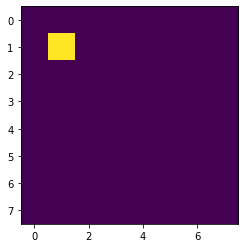

In [81]:
plt.imshow(testf[150])

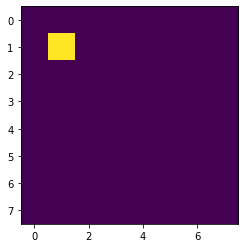

In [82]:
plt.imshow(testf[145])

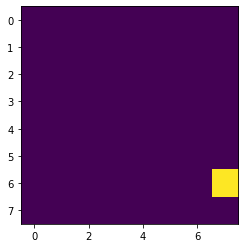

In [83]:
plt.imshow(testf[37])

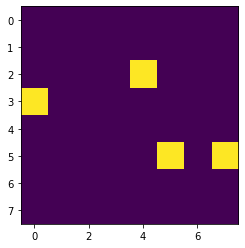

In [84]:
plt.imshow(testf[0])

In [85]:
itest.iloc[44,0]

'516,516,516,516,261,'

In [86]:
t=itest.iloc[44,0].split(',')

In [87]:
t

['516', '516', '516', '516', '261', '']

In [88]:
set(t)

{'', '261', '516'}

In [89]:
t.count('516')

4

In [90]:
max(set(t), key=t.count)

'516'

In [91]:
tnp=np.array(t)

In [92]:
unique, counts = np.unique(tnp, return_counts=True)

In [93]:
unique

array(['', '261', '516'], dtype='<U3')

In [94]:
counts

array([1, 1, 4])

In [95]:
index = np.argmax(counts)

In [96]:
tnp[index]

'516'

In [97]:
np.count_nonzero(test[10]==1)

1

In [98]:
encode_train_df['x'].shape

(633,)

In [99]:
mean_x=encode_train_df['x'].mean()

In [100]:
mean_y=encode_train_df['y'].mean()

In [101]:
var_x=np.power((encode_train_df['x']-mean_x),2).sum()/(948-1)

In [102]:
var_x

0.7256931196170473

In [103]:
var_y=np.power((encode_train_df['y']-mean_y),2).sum()/(948-1)

In [104]:
var_y

0.629676698001914

In [105]:
cov=np.multiply((encode_train_df['x']-mean_x),(encode_train_df['y']-mean_y)).sum()/(948-1)

In [106]:
cov_mat=[[var_x,cov],[cov,var_y]]

In [107]:
cov_mat

[[0.7256931196170473, 0.3792815163117905],
 [0.3792815163117905, 0.629676698001914]]

In [108]:
U, S, Vh = np.linalg.svd(cov_mat, full_matrices=True)

In [109]:
U

array([[-0.75019156, -0.66122055],
       [-0.66122055,  0.75019156]])

In [110]:
S

array([1.05999271, 0.2953771 ])

In [111]:
Vh

array([[-0.75019156, -0.66122055],
       [-0.66122055,  0.75019156]])

In [112]:
#!pwd

In [113]:
#autoencoder.save_weights("model_weights2.h5")

In [114]:
#ls